# <font color='#E8F6EF'>**Storytelling Notebook: Student Performance**</font> 

- In this notebook, we will apply storytelling techniques along EDA to craft a story from a dataset. 

- We will be using a dataset of student performance (test scores). 

- The dataset can be retrieved from here: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

<font color='#FF69B4'>**Question:**</font> We want to answer this: how do various factors affect student performance? 

## <font color='#FFA500'>**Importing Packages**</font> 

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## <font color='#FFA500'>**Loading Dataset**</font> 

In [46]:
exam_df = pd.read_csv('StudentsPerformance.csv')

In [47]:
exam_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
exam_df.shape

(1000, 8)

In [49]:
unique_column1 = exam_df['gender'].unique()
unique_column2 = exam_df['race/ethnicity'].unique()
unique_column3 = exam_df['parental level of education'].unique()
unique_column4 = exam_df['lunch'].unique()
unique_column5 = exam_df['test preparation course'].unique()

print(f'Unique values in gender: {unique_column1}')
print(f'Unique values in race/ethnicity: {unique_column2}')
print(f'Unique values in parental level of education: {unique_column3}')
print(f'Unique values in lunch: {unique_column4}')
print(f'Unique values in test preparation course: {unique_column5}')


Unique values in gender: ['female' 'male']
Unique values in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in lunch: ['standard' 'free/reduced']
Unique values in test preparation course: ['none' 'completed']


<font size="+2" color='#00CED1'><b> ✨Insights </b></font>

- The dataset consists of `8` columns and `1000` records. 

- Columns are as follows:
    - **`Gender`**: Sex of students &rarr; (Male/Female)
    - **`Race/Ethnicity`**:</strong> Ethnicity of students &rarr; (Group A, B, C, D, E)
    - **`Parental Level of Education`**:</strong> Parents' final education &rarr; (Bachelor's degree, Some college, Master's degree, Associate's degree, High School, Some high school)
    - **`Lunch`**:</strong> Having lunch before test &rarr; (Standard or Free/reduced)
    - **`Test Preparation Course`**:</strong> Complete or not complete before test
    - **`Math Score`**: Score of math exam
    - **`Reading Score`**: Score of reading exam
    - **`Writing Score`**: Score of writing exam


## <font color='#FFA500'>**Exploratory Data Analysis (EDA)**</font> 

Let's start with investigating missing values.

In [50]:
exam_df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [51]:
exam_df.duplicated().sum()

0

In [52]:
exam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [53]:
exam_df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


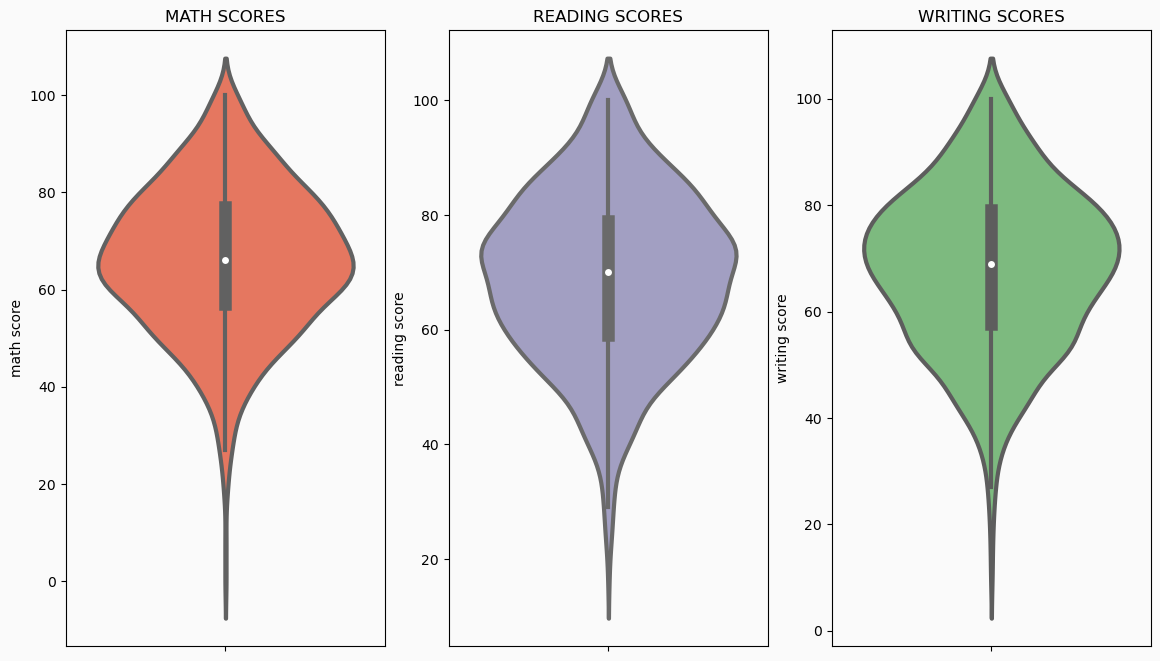

In [54]:
# Violin Plots of grades

plt.rcParams['figure.facecolor'] = "#fafafa"
plt.rcParams['axes.facecolor'] = "#fafafa"


plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=exam_df, palette='Reds', linewidth=3)  

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=exam_df, palette='Purples', linewidth=3) 

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=exam_df, palette='Greens', linewidth=3)  

plt.show()


<font size="+2" color='#00CED1'><b> ✨Insights </b></font>

From the preliminary descriptive statistics, we can conclude the following:
- All values are unique, and no values are missing.
- Descriptive statistics reveal that all the means and standard deviations are almost similar. 
- While there is a minimum score  0 for math, for writing minimum is much higher (10) and for reading is 17. 
- Most students score between 60 and 80 in maths, whereas most score from 50 to 80 in reading and writing.

<font color='#FF69B4'>**Note:**</font>  
To help determine and simplify the students grades, we will be creating a variable, "`pass_grade`" in which a failing grade is a grade below 40. 
Also, all other grades would be categorized as follow: 

**`Grading System`**:  
A (First-Class honours) = 70 - 100  
B (Second-Class honours; upper division) = 60 -69  
C (Second-Class honours; lower division)= 50 - 59  
D (Third-class honours) = 40 - 49  
F (Fail) = Below 40  

In [55]:
#Defning a passing grade:
pass_grade = 40

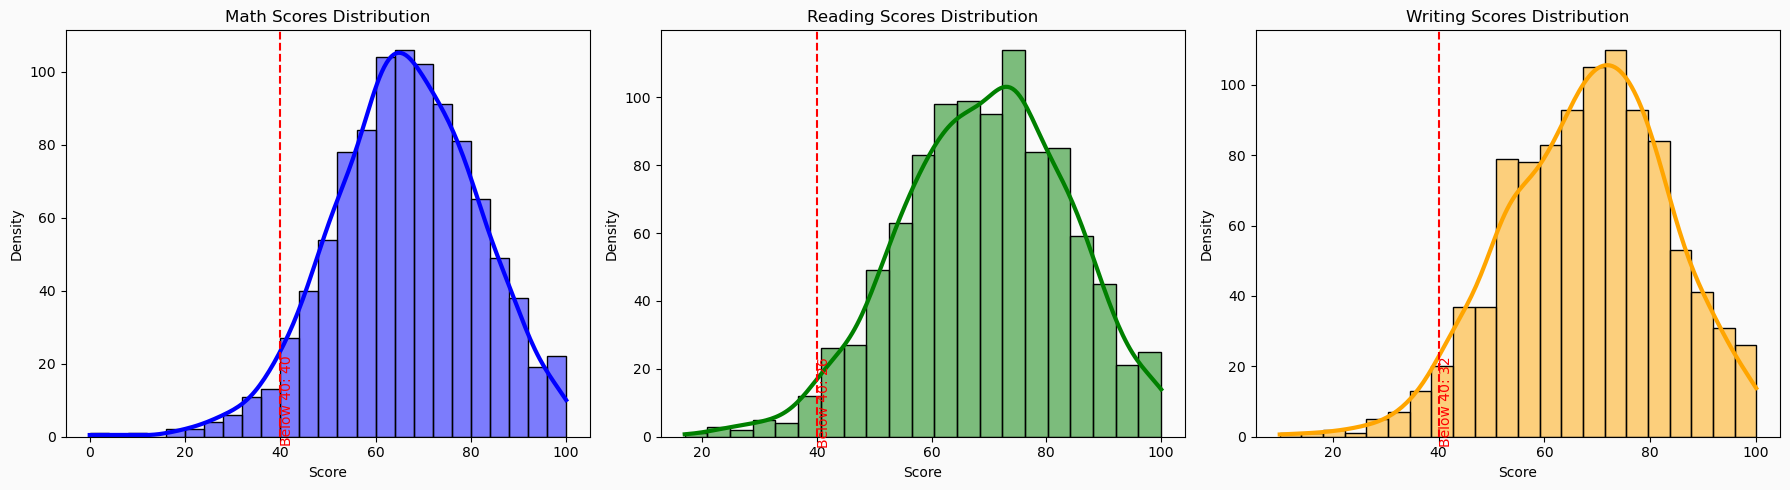

In [56]:


# Function to plot histogram with KDE using seaborn
def plot_histogram_with_kde(data, column, title, color):
    sns.histplot(data[column], kde=True, color=color, line_kws={'linewidth': 3})
    plt.axvline(x=40, color='r', linestyle='--')
    below_40 = len(data[data[column] < 40])
    plt.text(40, 10, f'Below 40: {below_40}', rotation=90, verticalalignment='center', color='red')
    plt.title(title)
    plt.xlabel('Score')
    plt.ylabel('Density')

plt.figure(figsize=(18, 5))

# Plot for math scores
plt.subplot(1, 3, 1)
plot_histogram_with_kde(exam_df, 'math score', 'Math Scores Distribution', 'blue')

# Plot for reading scores
plt.subplot(1, 3, 2)
plot_histogram_with_kde(exam_df, 'reading score', 'Reading Scores Distribution', 'green')

# Plot for writing scores
plt.subplot(1, 3, 3)
plot_histogram_with_kde(exam_df, 'writing score', 'Writing Scores Distribution', 'orange')

plt.tight_layout()
plt.show()


In [57]:
# Calculate the number of students scoring below 40 in each subject
below_40_math = len(exam_df[exam_df['math score'] < 40])
below_40_reading = len(exam_df[exam_df['reading score'] < 40])
below_40_writing = len(exam_df[exam_df['writing score'] < 40])

print(f'{below_40_math} students has failed their math exam. ')
print(f'{below_40_reading} students has failed their reading exam. ')
print(f'{below_40_writing} students has failed their writing exam. ')


40 students has failed their math exam. 
26 students has failed their reading exam. 
32 students has failed their writing exam. 


Now, let's add the grading system to our data frame. 

In [58]:
# Function to assign grades based on the scores
def assign_grade(score):
    if 70 <= score <= 100:
        return 'A'  # First-Class honours
    elif 60 <= score <= 69:
        return 'B'  # Second-Class honours, upper division
    elif 50 <= score <= 59:
        return 'C'  # Second-Class honours, lower division
    elif 40 <= score <= 49:
        return 'D'  # Third-Class honours
    else:
        return 'F'  # Fail

# Applying the function to each score column to create new grade columns
exam_df['Math_Grade'] = exam_df['math score'].apply(assign_grade)
exam_df['Reading_Grade'] = exam_df['reading score'].apply(assign_grade)
exam_df['Writing_Grade'] = exam_df['writing score'].apply(assign_grade)

exam_df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_Grade,Reading_Grade,Writing_Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,A,A,A
1,female,group C,some college,standard,completed,69,90,88,B,A,A
2,female,group B,master's degree,standard,none,90,95,93,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,D,C,D
4,male,group C,some college,standard,none,76,78,75,A,A,A


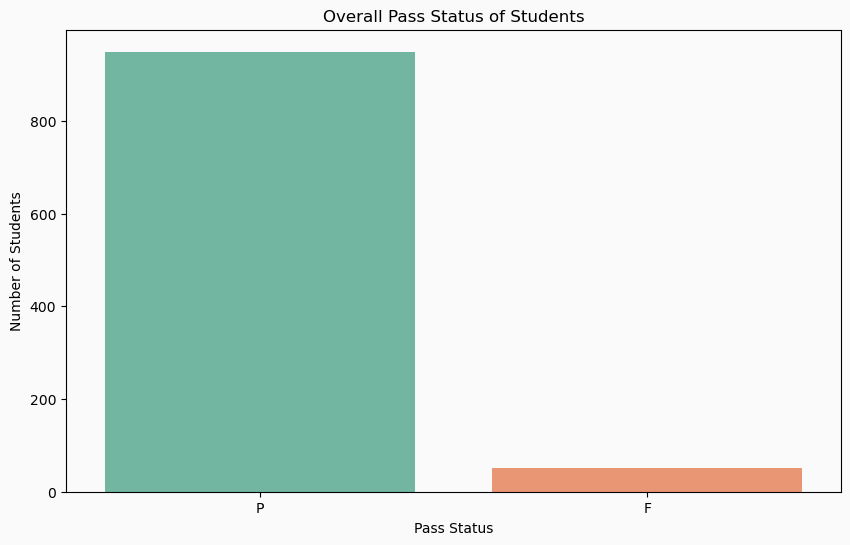

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

In [61]:
# Updating the DataFrame with the overall pass status based on the new grade columns
exam_df['OverAll_PassStatus'] = exam_df.apply(lambda x: 'F' if 'F' in [x['Math_Grade'], x['Reading_Grade'], x['Writing_Grade']] else 'P', axis=1)

# Counting overall pass status
overall_pass_status_counts_example = exam_df['OverAll_PassStatus'].value_counts()

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x=overall_pass_status_counts_example.index, y=overall_pass_status_counts_example.values, palette='Set2')
plt.title('Overall Pass Status of Students')
plt.xlabel('Pass Status')
plt.ylabel('Number of Students')
plt.show()

overall_pass_status_counts_example


<font size="+2" color='#00CED1'><b> ✨Insights </b></font>

- I can be observed that there are 40, 26, 32 students failed math, reading and writing respectively. 
- In total, 51 students have been failed (i.e., failed at least one of the exams), and 949 students have passed the exams. 


### Distribution of Categorical Features

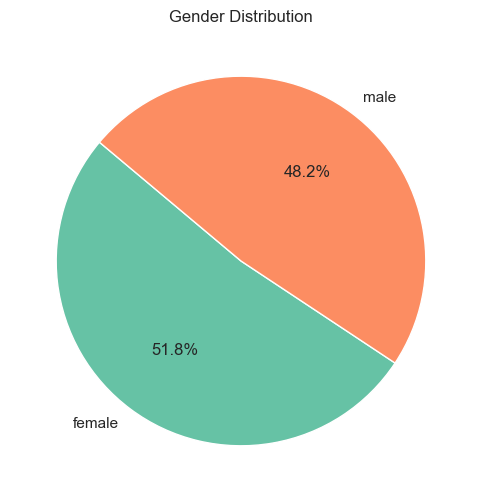

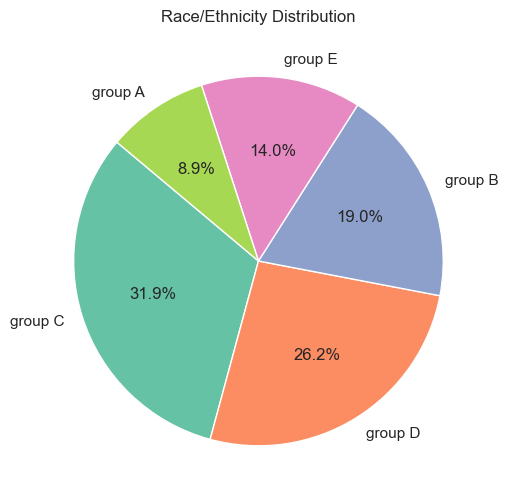

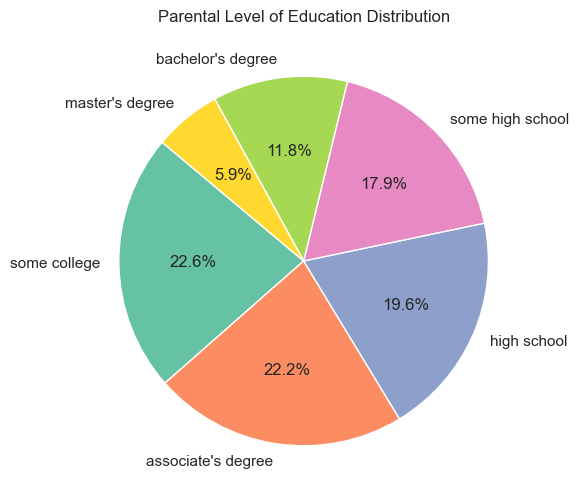

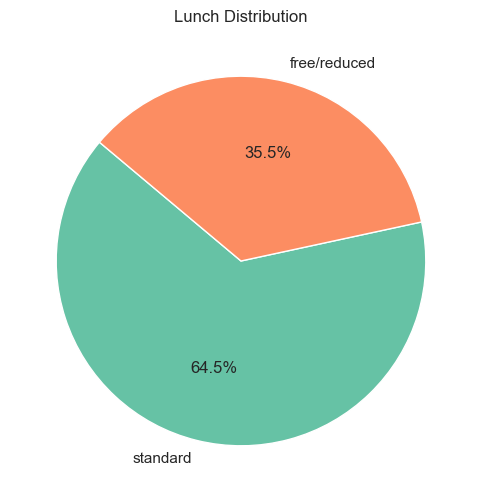

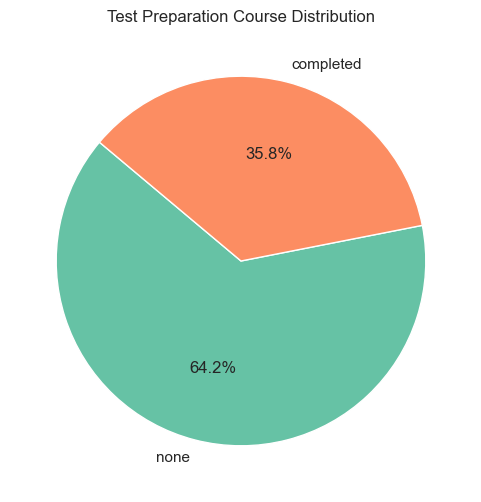

In [92]:
# Function to create a pie chart for a given column using a color palette
def create_pie_chart(column, title, palette):
    counts = column.value_counts()
    colors = sns.color_palette(palette, len(counts))
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(title)
    plt.show()

# Define a color palette
palette = "Set2"

# Create a pie chart for each categorical feature using the defined palette
create_pie_chart(exam_df['gender'], 'Gender Distribution', palette)
create_pie_chart(exam_df['race/ethnicity'], 'Race/Ethnicity Distribution', palette)
create_pie_chart(exam_df['parental level of education'], 'Parental Level of Education Distribution', palette)
create_pie_chart(exam_df['lunch'], 'Lunch Distribution', palette)
create_pie_chart(exam_df['test preparation course'], 'Test Preparation Course Distribution', palette)



<font size="+2" color='#00CED1'><b> ✨Insights </b></font>

- The gender distribution is nearly balanced with females slightly more than males, at 51.8% and 48.2% respectively. This indicates that any gender-based trends or performance differences observed in the data are not due to a large disparity in the number of male and female students.
- The pie chart shows that the most represented race/ethnicity group in the dataset is group C (31.9%), followed by groups D, B, E, and A. The least represented is group A (8.9%). 
- A significant majority of students, 64.5%, have standard lunch, while 35.5% have free/reduced lunch. This information might be indicative of socioeconomic status, which can be a factor in academic performance.
- Most of the students (64.2%) did not complete a test preparation course, while 35.8% did.
- The parental education levels are varied, with the largest segments being some college and associate's degree (both over 22%), followed by high school and bachelor's degree (around 19%). A smaller proportion of parents have a master's degree (5.9%) or some high school (17.9%). 

### Distribution of Exam Scores based on other Features

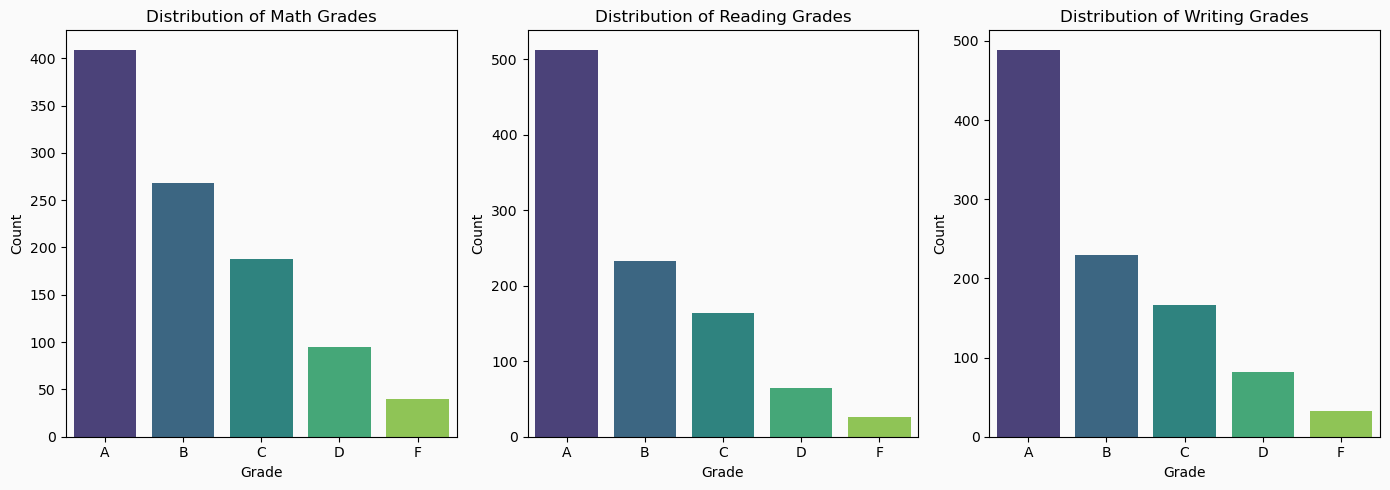

In [65]:
# Counting the occurrences of each grade for each subject
math_grade_counts = exam_df['Math_Grade'].value_counts().sort_index()
reading_grade_counts = exam_df['Reading_Grade'].value_counts().sort_index()
writing_grade_counts = exam_df['Writing_Grade'].value_counts().sort_index()

# Plotting the results for each subject
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
sns.barplot(x=math_grade_counts.index, y=math_grade_counts.values, palette='viridis')
plt.title('Distribution of Math Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.barplot(x=reading_grade_counts.index, y=reading_grade_counts.values, palette='viridis')
plt.title('Distribution of Reading Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.barplot(x=writing_grade_counts.index, y=writing_grade_counts.values, palette='viridis')
plt.title('Distribution of Writing Grades')
plt.xlabel('Grade')
plt.ylabel('Count')

plt.tight_layout()
plt.show()




### Comparing Gender and Test Prep

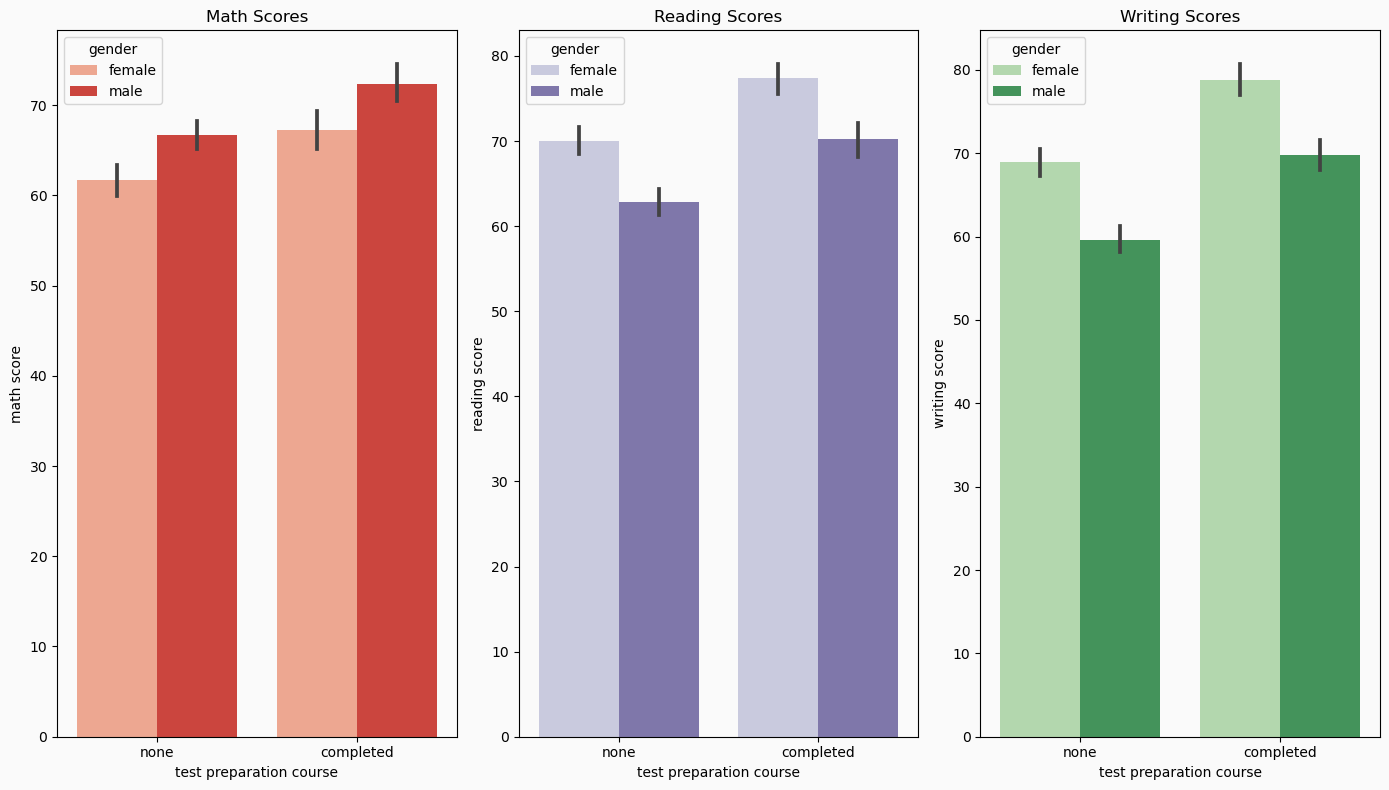

In [68]:
# Setting the plot background and axes colors
plt.rcParams['figure.facecolor'] = "#fafafa"
plt.rcParams['axes.facecolor'] = "#fafafa"

# Creating the plots
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course', y='math score', data=exam_df, hue='gender', palette='Reds')
plt.title('Math Scores')

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course', y='reading score', data=exam_df, hue='gender', palette='Purples')
plt.title('Reading Scores')

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course', y='writing score', data=exam_df, hue='gender', palette='Greens')
plt.title('Writing Scores')

plt.tight_layout()
plt.show()


<font size="+2" color='#00CED1'><b> ✨Insights </b></font>

- From these scores we can see that students who tend to complete a test preparation course perform better than those who do not complete a test preparation course. 
- It also seems that in general, males tend to perform better in the math exams whereas females tend to perform better in the reading and writing exam.


### Comparing Test Prep and Lunch Status 

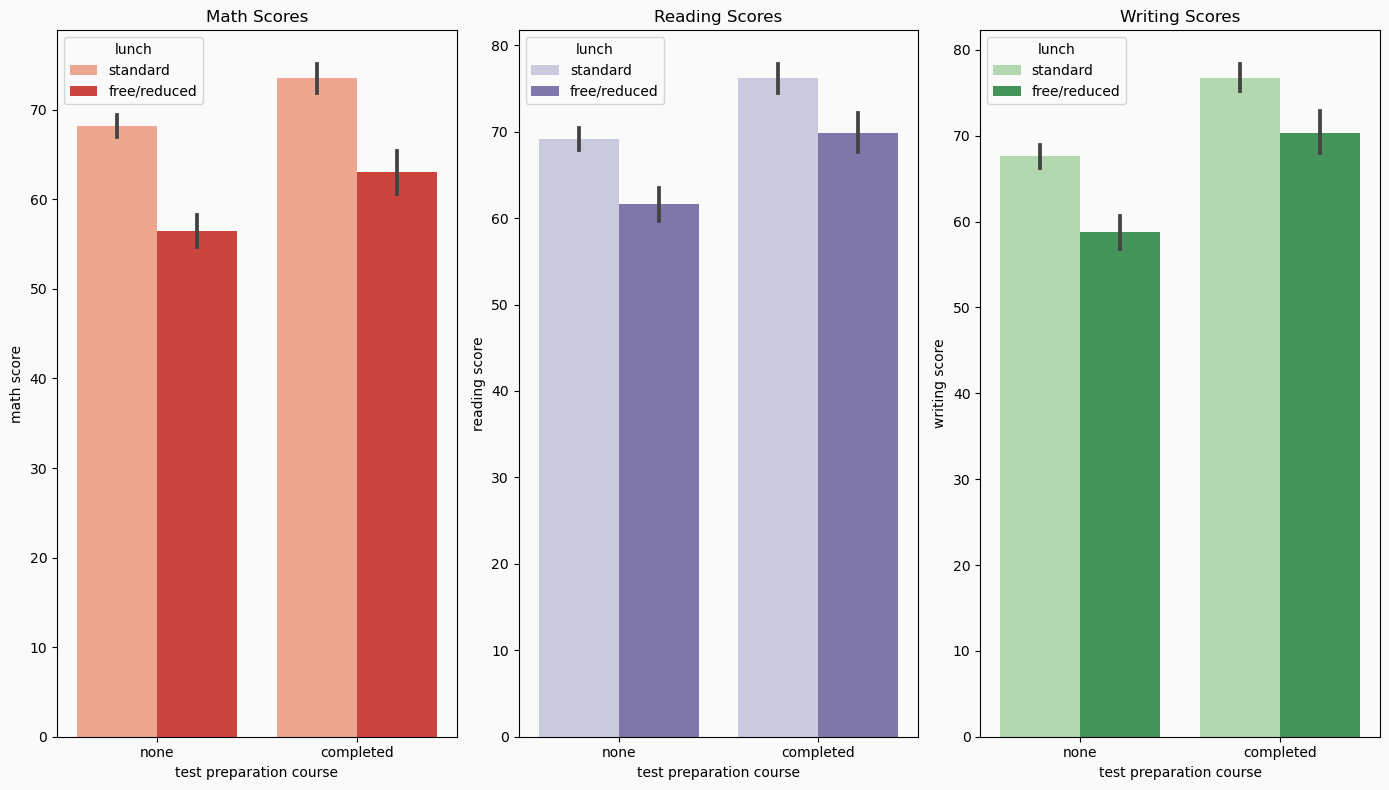

In [69]:
# Setting the plot background and axes colors
plt.rcParams['figure.facecolor'] = "#fafafa"
plt.rcParams['axes.facecolor'] = "#fafafa"

# Creating the plots
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course', y='math score', data=exam_df, hue='lunch', palette='Reds')
plt.title('Math Scores')

plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course', y='reading score', data=exam_df, hue='lunch', palette='Purples')
plt.title('Reading Scores')

plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course', y='writing score', data=exam_df, hue='lunch', palette='Greens')
plt.title('Writing Scores')

plt.tight_layout()
plt.show()

<font size="+2" color='#00CED1'><b> ✨Insights </b></font>

- We can conclude that students who had standard lunch opposed to free lunch performed better overall despite having completed the test preparation course or not. This could lead into further examination into the students financial/economic situation and how that affects exam performance.

### Comparing Gender and Race/Ethnicity

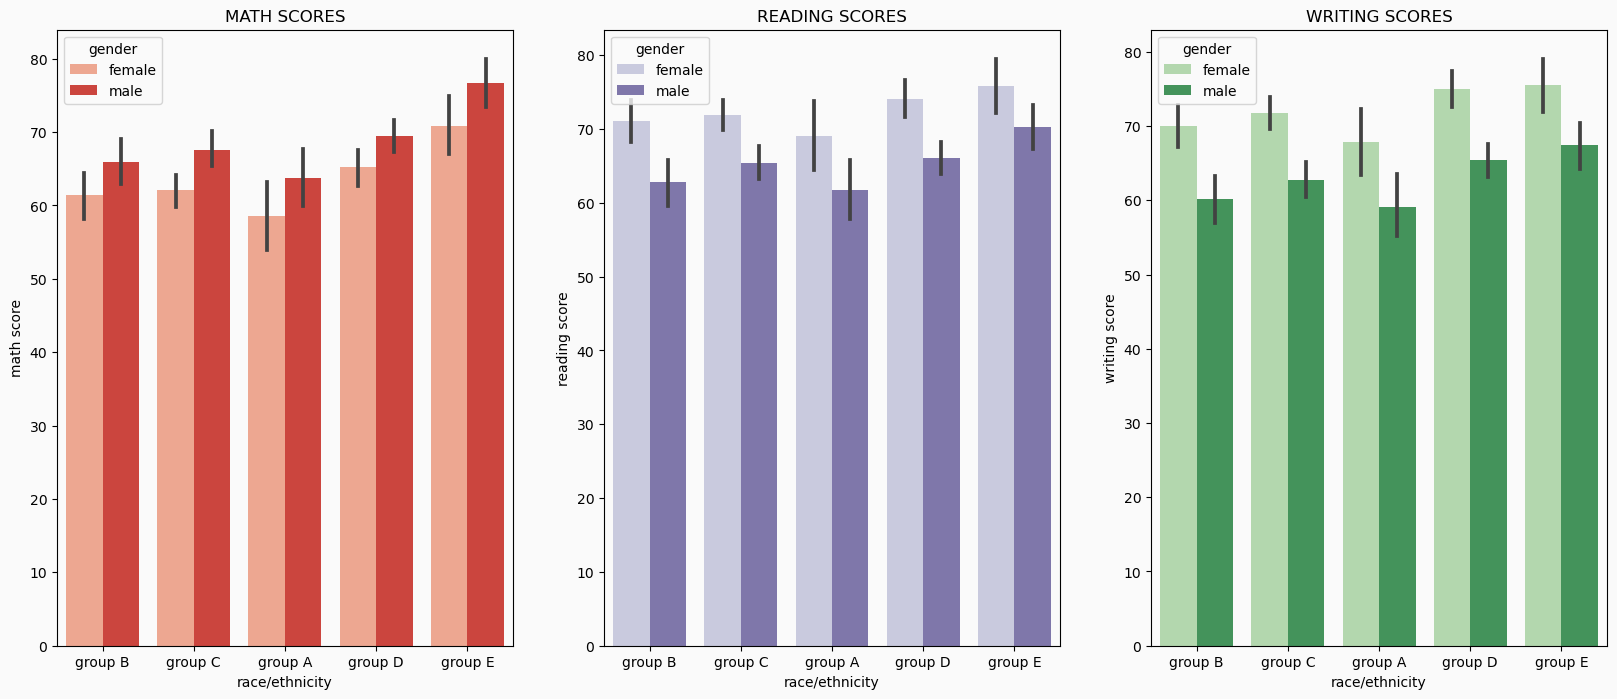

In [73]:
plt.rcParams['figure.facecolor'] = "#fafafa"
plt.rcParams['axes.facecolor'] = "#fafafa"

plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.barplot(x='race/ethnicity',y='math score',data=exam_df,hue='gender',palette='Reds')

plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.barplot(x='race/ethnicity',y='reading score',data=exam_df,hue='gender',palette='Purples')

plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.barplot(x='race/ethnicity',y='writing score',data=exam_df,hue='gender',palette='Greens')
plt.show()

<font size="+2" color='#00CED1'><b> ✨Insights </b></font>

- We can observe that in math exam, males perform better across the different races/ethnicities. 
- We see that across different races/ethnicities, females perform better in writing and reading scores. 
- Group E achieved the highest scores in all three exams, while groups A scored lowest. 

### Comparing Gender and Parental Level of Education

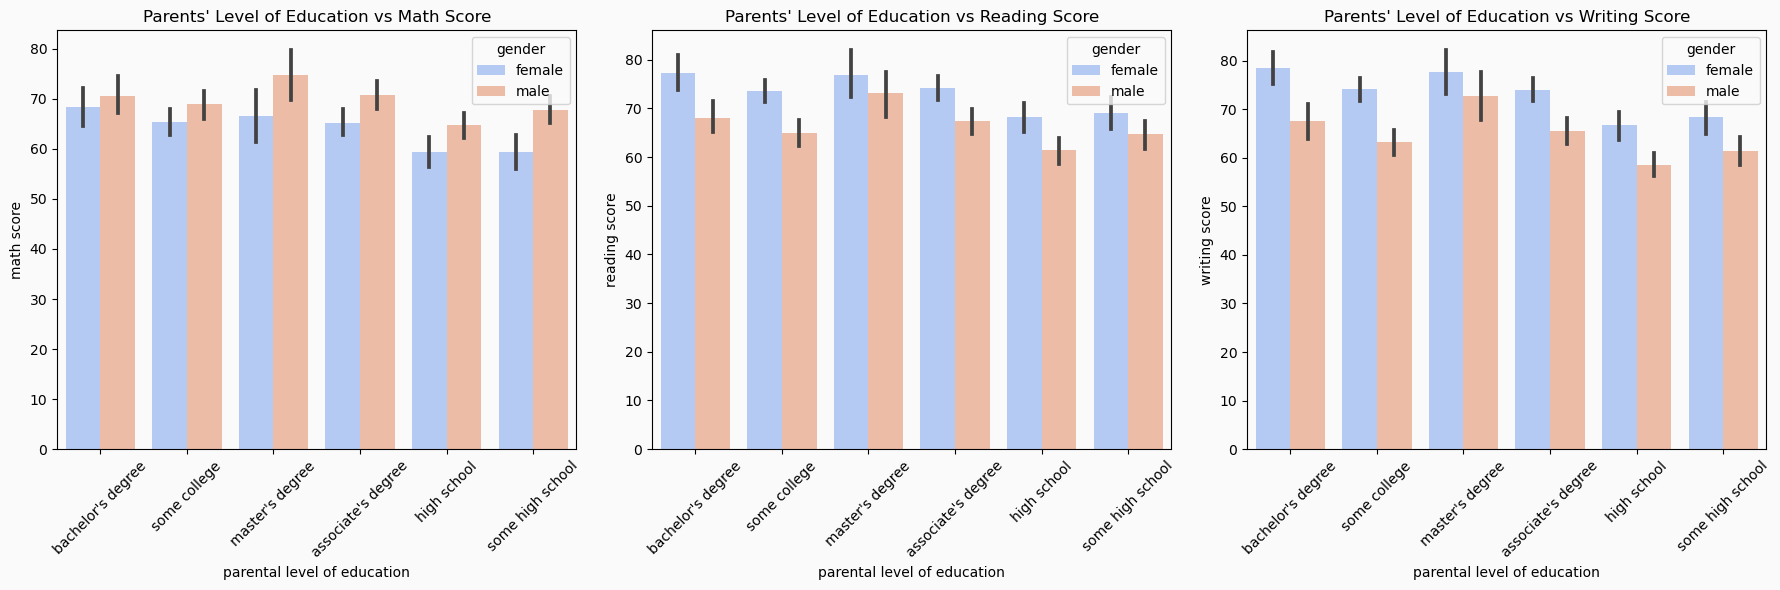

In [74]:
# Setting the plot background and axes colors
plt.rcParams['figure.facecolor'] = '#fafafa'
plt.rcParams['axes.facecolor'] = '#fafafa'

# Creating separate plots for each subject score compared to the parental level of education and gender
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Parents' Level of Education vs Math Score")
sns.barplot(x='parental level of education', y='math score', hue='gender', data=exam_df, palette='coolwarm')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.title("Parents' Level of Education vs Reading Score")
sns.barplot(x='parental level of education', y='reading score', hue='gender', data=exam_df, palette='coolwarm')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
plt.title("Parents' Level of Education vs Writing Score")
sns.barplot(x='parental level of education', y='writing score', hue='gender', data=exam_df, palette='coolwarm')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



<font size="+2" color='#00CED1'><b> ✨Insights </b></font>

- Students whose parents have higher levels of education (bachelor's degree, master's degree) tend to have higher scores across all subjects.
- This trend suggests that parental education may have a positive influence on student performance.
- Across all levels of parental education, females tend to perform better in reading and writing compared to males.
- Males, on the other hand, seem to have a slight advantage in math scores, particularly when their parents have some college education or a bachelor's degree.
- Highest variance observed in reading scores for students whose parents have a master's degree. This suggests there might be a wider range of reading scores within this group.
- Interestingly, students with parents holding an associate's degree score comparably to those with parents who have a master's degree, especially in math and reading. This could imply that beyond a certain education level, the benefit to children's average scores plateaus or that other factors (such as quality of schooling or student dedication) may play a significant role.

### Pairplot of Features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


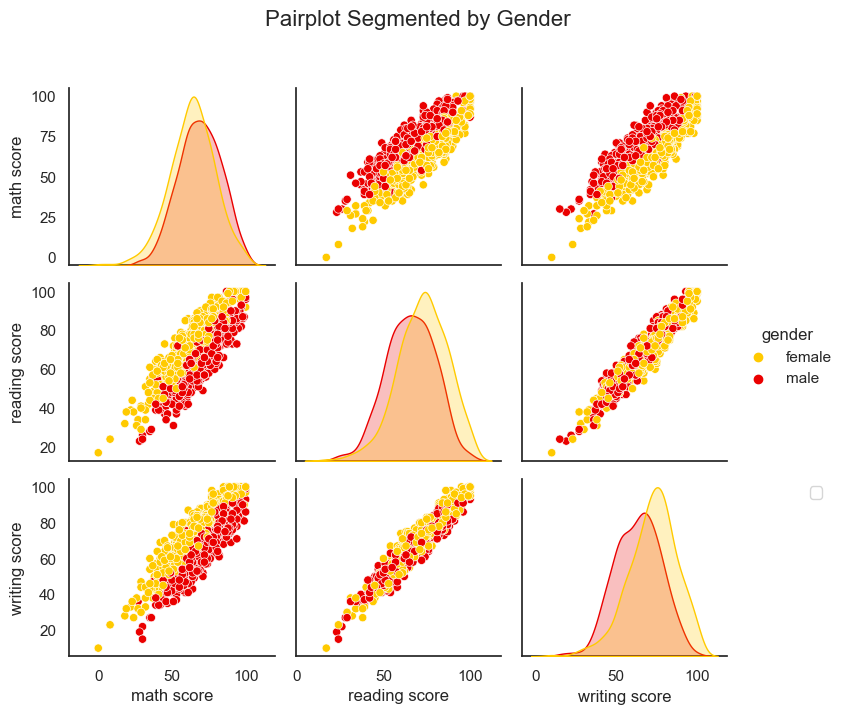

In [88]:
pairplot = sns.pairplot(exam_df,hue = 'gender', palette='hot_r')
plt.suptitle('Pairplot Segmented by Gender', size=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


From this graph we can see that there might be some correlation among the features. 

Therefore, let's take a look at the heat map:

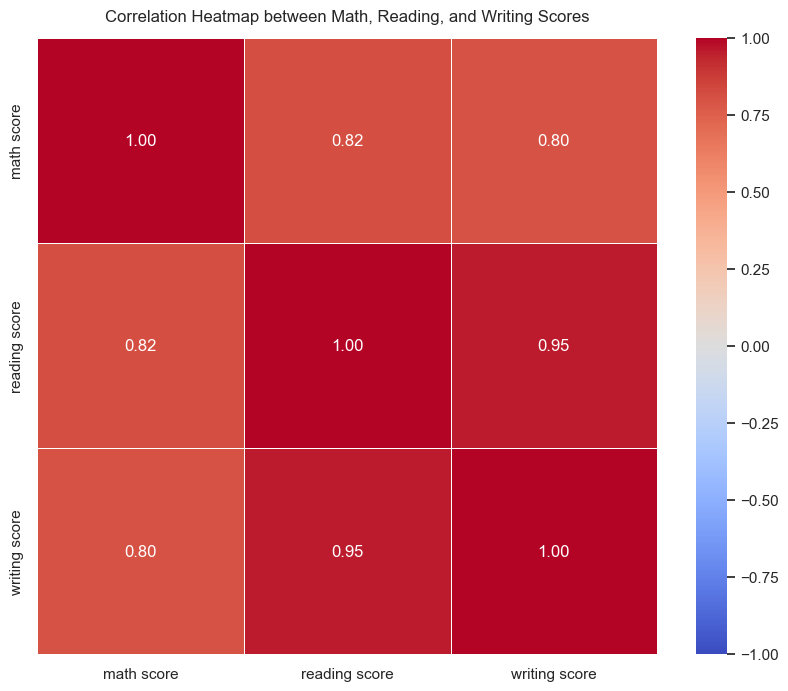

In [90]:
scores_data = exam_df[['math score', 'reading score', 'writing score']]
correlation_matrix = scores_data.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
heatmap.set_title('Correlation Heatmap between Math, Reading, and Writing Scores', fontdict={'fontsize':12}, pad=12)
plt.show()


<font size="+2" color='#00CED1'><b> ✨Insights </b></font>

- Clearly we can see how there is a strong correlation of 0.95 between reading and writing scores and a weaker correlation of 0.82 and 0.80 between math scores and reading scores and math scores and writing scores. 
- We can assume that if a student performs well in the writing exam, then they should also perform well in the reading exam and vice versa.

## <font color='#FFA500'>**Final Thoughts**</font> 

This notebook has presented a detailed exploration of the varied facets impacting student scores. 

Key observations include:

- **`Performance Across Subjects`**: There is a distinct interrelation between subjects, most notably between reading and writing, where a high correlation (0.95) suggests that proficiency in one often translates to proficiency in the other. The relationship between math and the other subjects is present, albeit to a lesser extent.

- **`Influence of Background Variables`**: Gender, race/ethnicity, and lunch status have emerged as influential factors, with gender differences becoming pronounced in subject-specific performance. Females have been observed to excel in reading and writing, while males generally perform better in math. Socioeconomic factors, as inferred from lunch status, also appear to play a role in academic outcomes.

- **`Parental Education`**: A student's performance correlates with their parents' educational background, particularly visible in families where parents hold bachelor's or master's degrees. This pattern suggests that parental education levels could foster environments more conducive to academic success. However, the benefits of higher parental education do not infinitely escalate student scores, as seen by the comparable performances of students with parents who have an associate's degree and those with a master's degree.

- **`Academic Interventions`**: The completion of test preparation courses is linked with improved student performance, underlining the value of academic support and preparedness.

- **`Demographics and Success`**: Group E stands out with the highest scores across all subjects, while Group A lags, indicating potential areas for targeted educational support. The nearly balanced gender distribution ensures that the insights derived from the analysis are not skewed by representation.

- **`Student Resilience`**: Despite the overarching trends, individual variations persist, with students across all backgrounds demonstrating a range of performances in each subject. This highlights the inherent resilience and potential within each student, regardless of their demographic or socioeconomic status.